In [63]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from edads2 import *

#Find 3D coordinates with respect to some given date
main_df = pd.read_csv("nasa.csv")
df = data_preprocess(main_df)
q = 1
given_date = ["2021-12-01", "2022-1-01", "2022-2-01", "2022-3-01", "2022-4-01", "2022-5-01",
             "2022-6-01", "2022-7-01", "2022-8-01", "2022-9-01", "2022-10-01", "2022-11-01", "2022-12-01"]
coords = kepler_solver( a = df['a'][q], e = df['e'][q], 
                        omega = df['asc_node'][q],
                        w =  df['perihelion_arg'][q], 
                        i = df['inclination'][q], 
                        period = df['orbital_period'][q], 
                        given_date = given_date, close_date = df["close_date"][q])

import numpy as np
import math as m

def cart2sph(coords_3d):
    assert isinstance(coords_3d,tuple)
    x = coords_3d[0]
    y = coords_3d[1]
    z = coords_3d[2]
    tmp = x**2 + y**2
    r = m.sqrt(tmp + z**2)               # r
    theta = m.atan2(z,m.sqrt(tmp))     # theta
    phi = m.atan2(y,x)                           # phi
    return r, (theta*180/pi), (phi*180/pi)

r_array = []
theta_array = []
phi_array = []
sp = map(cart2sph, coords)
for i in sp:
    r_array.append(i[0])
    theta_array.append(i[1])
    phi_array.append(i[2])


x_array = []
y_array = []
z_array = []
for i in coords:
    x_array.append(i[0])
    y_array.append(i[1])
    z_array.append(i[2])

#convert given date format
date_read = []
for date in given_date:
    p = datetime.datetime.strptime(date, '%Y-%m-%d')
    date_read.append(p.strftime('%B %d, %Y'))

<IPython.core.display.Javascript object>


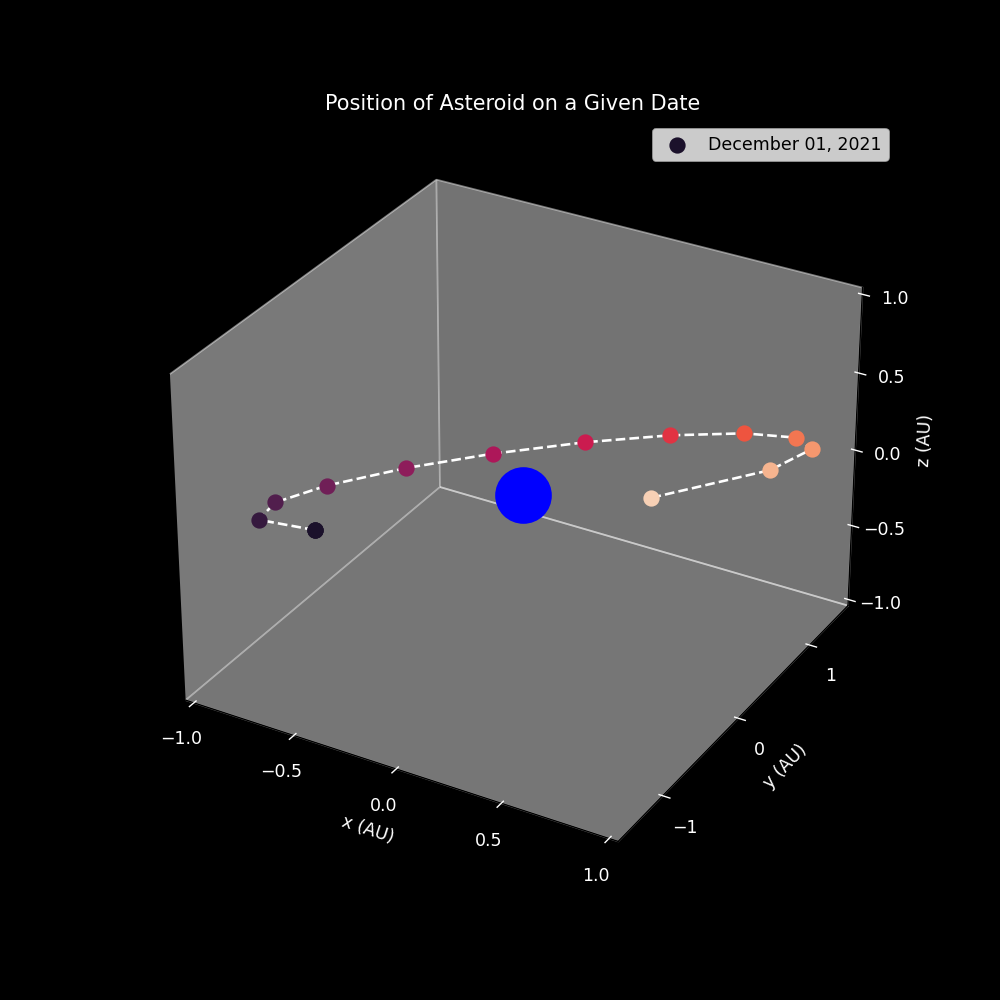

In [64]:
cmap = sns.color_palette(palette='rocket', n_colors=len(x_array))
sp=list(sp)
#define animation function
def animate(i):
    sctt = ax.scatter3D(x_array[i], y_array[i], z_array[i], c = cmap[i], s=70);
    plt.legend([sctt], [date_read[i]])

    return sctt


#Set Figure properties
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

ax.scatter3D(0, 0, 0, c='blue', s=1000)
ax.grid(False)
ax.set_facecolor('black')
fig.set_facecolor('black')

#Set axes properties
ax.set_xlim([-1, 1])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1, 1])

ax.set_xlabel("x (AU)")
ax.xaxis.label.set_color('white')
ax.set_ylabel("y (AU)")
ax.yaxis.label.set_color('white')
ax.set_zlabel("z (AU)")
ax.zaxis.label.set_color('white')
ax.set_title("Position of Asteroid on a Given Date", color='white')

ax.tick_params(axis='x', colors='white')
plt.locator_params(axis="x", nbins=5)
ax.tick_params(axis='y', colors='white')
plt.locator_params(axis="y", nbins=5)
ax.tick_params(axis='z', colors='white')
plt.locator_params(axis="z", nbins=5)


#run and save animation
anim = FuncAnimation(fig, animate, frames = 13, interval = 500, blit = True)
plt.plot(x_array, y_array, z_array, color='white', linestyle='dashed')


#anim.save('C:/Users/ameya/PycharmProjects/ECE 143 project/astrojectory/nonhazardous_astro.gif', writer = 'Pillow', fps = 1)

